# Predicting which team will win a football match

The purpose of this project is to use machine learning in order to make predictions regarding football matches. 
We have 5 .csv files, each file containing different data which might help in make predictions.

In [868]:
# importing neccesary libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
import itertools

%matplotlib inline

### Reading data from the files

In [869]:
# Read data from .csv files 

loc = "voetbal_1956-20220309/"

raw_cards_file = pd.read_csv (loc + '_cards.csv')
raw_goals_file = pd.read_csv (loc + '_goals.csv')
raw_matches_file = pd.read_csv (loc + '_matches.csv')
raw_players_file = pd.read_csv (loc + '_players.csv')
raw_subs_file = pd.read_csv (loc + '_subs.csv')

### Goals

In [870]:
# Method used to overwrite values found in column 'assist'
def assist(value):
    if pd.notna(value):
        return 1
    else:
        return 0

In [871]:
# a function to remove duplicates 
def Duplicates(rawName , colName: str, previousName: str, newName: str ):
        if colName == "club":
                rawName["home"].replace({previousName: newName }, inplace=True)
                rawName["away"].replace({previousName: newName }, inplace=True)
                rawName["team"].replace({previousName: newName }, inplace=True)
        elif colName == "match":
                rawName["home"].replace({previousName: newName }, inplace=True)
                rawName["away"].replace({previousName: newName }, inplace=True)
        elif colName == "card": 
                rawName["type"].replace({previousName: newName }, inplace=True)
        else:
                print("nothing")

# a function used to get the last season
def toOneSeason(season):
    return season[5:len(season)]

In [872]:
# Some clubs have different names 
# We replace it to one name 
Duplicates(raw_goals_file, "club", "afc-ajax", "ajax-amsterdam")
Duplicates(raw_goals_file, "club", "willem-ii", "willem-ii-tilburg")

# convert the season to int 
raw_goals_file['saison'] = raw_goals_file['saison'].apply(toOneSeason)
raw_goals_file['saison'] = raw_goals_file['saison'].astype(int)

# filter the last 10 seasons 
filterSeason = raw_goals_file[(raw_goals_file['saison'] >= 2012)]

# make new dataframe in order to aggregate
dfGoals = pd.DataFrame(filterSeason)

# We use assist function for both 'assist' and 'player' colunms to count the assists and goals for each game
assistNumber = raw_goals_file['assist'].apply(assist)
goalNumber = raw_goals_file['player'].apply(assist)

dfGoals['assistNumber'] = assistNumber
dfGoals['goalNumber'] = goalNumber

# we drop the unneccesary columns 
dfGoals.drop(columns=['new_score','type','minute','round'])

,Unnamed: 0,saison,home,away,team,player,assist,assistNumber,goalNumber
50894,0,2012,ado-den-haag,ajax-amsterdam,ajax-amsterdam,Jody Lukoki,Theo Janssen,1,1
50895,1,2012,ado-den-haag,ajax-amsterdam,ajax-amsterdam,Jan Vertonghen,Ismaïl Aissati,1,1
50896,2,2012,ado-den-haag,az-alkmaar,az-alkmaar,Charlison Benschop,Brett Holman,1,1
50897,3,2012,ado-den-haag,az-alkmaar,az-alkmaar,Charlison Benschop,Maarten Martens,1,1
50898,4,2012,ado-den-haag,az-alkmaar,az-alkmaar,Charlison Benschop,Rasmus Elm,1,1
...,...,...,...,...,...,...,...,...,...
60864,639,2022,willem-ii-tilburg,sc-cambuur,willem-ii-tilburg,Godfried Roemeratoe,Anargyros Kampetsis,1,1
60865,640,2022,willem-ii-tilburg,sc-cambuur,sc-cambuur,Mitchell Paulissen,NaN,0,1
60866,641,2022,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,Bart Vriends,Bryan Smeets,1,1
60867,642,2022,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,Bart Vriends,Sven Mijnans,1,1


In [873]:
# the best player of Ajax (Assist, Goals)
filterAjaxPlayers = dfGoals[(dfGoals['team'] == "ajax-amsterdam")]
playersAssistAjax = filterAjaxPlayers.groupby('player')['assistNumber'].sum()
print(playersAssistAjax.nlargest(n=5))

playersGoalsAjax = filterAjaxPlayers.groupby('player')['goalNumber'].sum()
print(playersGoalsAjax.nlargest(n=5))

player
Davy Klaassen          48
Klaas-Jan Huntelaar    37
Hakim Ziyech           29
Dušan Tadić            28
Kasper Dolberg         28
Name: assistNumber, dtype: int64
player
Davy Klaassen          61
Dušan Tadić            61
Lasse Schöne           49
Klaas-Jan Huntelaar    45
Hakim Ziyech           38
Name: goalNumber, dtype: int64


In [874]:
# the best player of Psv (Assist, Goals)
filterPsvPlayers = dfGoals[(dfGoals['team'] == "psv-eindhoven")]
playersAssistPsv = filterPsvPlayers.groupby('player')['assistNumber'].sum()
print(playersAssistPsv.nlargest(n=5))

playersGoalsPsv = filterPsvPlayers.groupby('player')['goalNumber'].sum()
print(playersGoalsPsv.nlargest(n=5))


player
Luuk de Jong           78
Donyell Malen          33
Georginio Wijnaldum    26
Jürgen Locadia         26
Gastón Pereiro         23
Name: assistNumber, dtype: int64
player
Luuk de Jong           94
Jürgen Locadia         45
Gastón Pereiro         44
Georginio Wijnaldum    41
Donyell Malen          40
Name: goalNumber, dtype: int64


Text(0, 0.5, 'Assist')

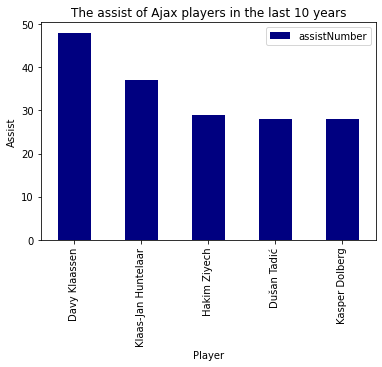

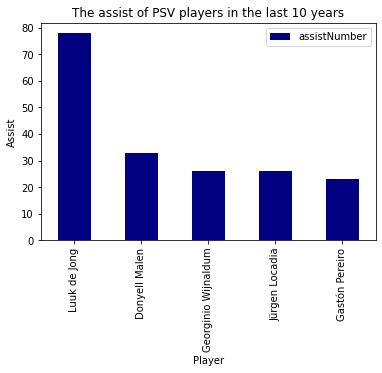

In [875]:
# plot Assist
dfAjaxAssist = pd.DataFrame(playersAssistAjax.nlargest(n=5))
ax = dfAjaxAssist.plot(lw=2, colormap='jet', title='The assist of Ajax players in the last 10 years', kind = 'bar')
ax.set_xlabel("Player")
ax.set_ylabel("Assist")

dfPsvAssist = pd.DataFrame(playersAssistPsv.nlargest(n=5))
ax = dfPsvAssist.plot(lw=2, colormap='jet', title='The assist of PSV players in the last 10 years', kind = 'bar')
ax.set_xlabel("Player")
ax.set_ylabel("Assist")


Text(0, 0.5, 'Goals')

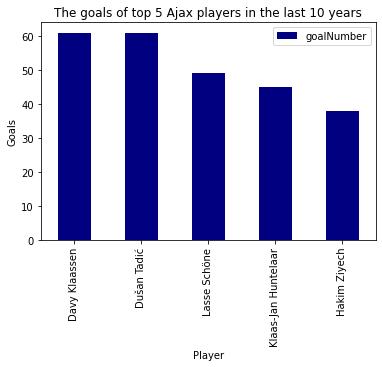

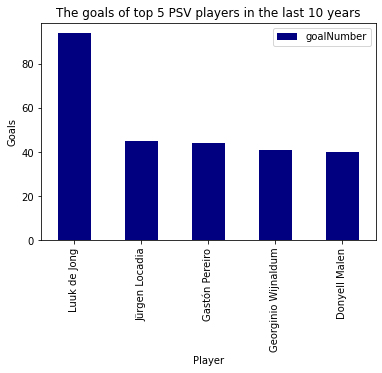

In [876]:
# plot Goals
dfAjaxGoals = pd.DataFrame(playersGoalsAjax.nlargest(n=5))
ax = dfAjaxGoals.plot(lw=2, colormap='jet', kind = 'bar', title='The goals of top 5 Ajax players in the last 10 years')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

dfPsvGoals = pd.DataFrame(playersGoalsPsv.nlargest(n=5))
ax = dfPsvGoals.plot(lw=2, colormap='jet', kind = 'bar', title='The goals of top 5 PSV players in the last 10 years')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

In [877]:
# The best 3 player in the Ajax - Psv Match  in psv Stadion (Ajax stats)
filterAjaxPlayersInPsvStadion = dfGoals[(dfGoals['team'] == "ajax-amsterdam") & (dfGoals['home'] == "psv-eindhoven")]
playersAssistAjaxInPsvStadion = filterAjaxPlayersInPsvStadion.groupby('player')['assistNumber'].sum()
print(playersAssistAjaxInPsvStadion.nlargest(n=5))

playersGoalsAjaxInPsvStadion = filterAjaxPlayersInPsvStadion.groupby('player')['goalNumber'].sum()
print(playersGoalsAjaxInPsvStadion.nlargest(n=5))

player
Anwar El Ghazi       2
Arkadiusz Milik      1
Brian Brobbey        1
Christian Eriksen    1
Derk Boerrigter      1
Name: assistNumber, dtype: int64
player
Anwar El Ghazi         2
Kolbeinn Sigþórsson    2
Arkadiusz Milik        1
Brian Brobbey          1
Christian Eriksen      1
Name: goalNumber, dtype: int64


In [878]:
# The best 3 player in the Ajax - Psv Match  in psv Stadium (psv stats)
filterPsvPlayersInPsvStadion = dfGoals[(dfGoals['team'] == "psv-eindhoven") & (dfGoals['away'] == "ajax-amsterdam")]
playersAssistPsvInPsvStadion = filterPsvPlayersInPsvStadion.groupby('player')['assistNumber'].sum()
print(playersAssistPsvInPsvStadion.nlargest(n=5))

playersGoalsPsvInPsvStadion = filterPsvPlayersInPsvStadion.groupby('player')['goalNumber'].sum()
print(playersGoalsPsvInPsvStadion.nlargest(n=5))

player
Luuk de Jong      3
Donyell Malen     1
Hirving Lozano    1
Jeremain Lens     1
Ji-Sung Park      1
Name: assistNumber, dtype: int64
player
Luuk de Jong      3
Gastón Pereiro    2
Jeremain Lens     2
Tim Matavž        2
Donyell Malen     1
Name: goalNumber, dtype: int64


Text(0, 0.5, 'Goals')

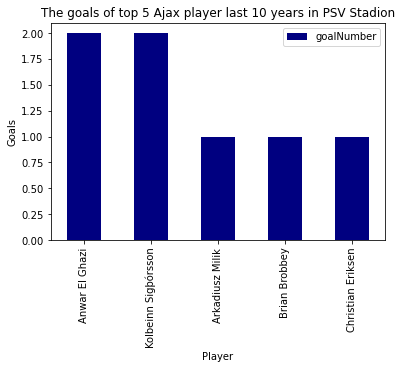

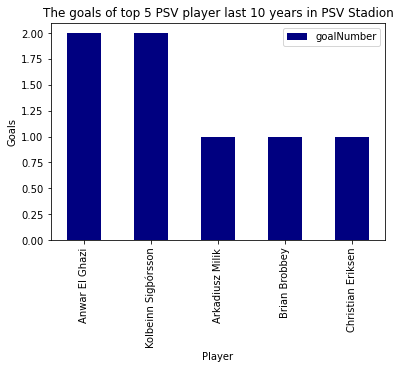

In [879]:
# plot Goals Ajax vs Psv in Psv stadion
dfAjaxGoalsinPsvStadion = pd.DataFrame(playersGoalsAjaxInPsvStadion.nlargest(n=5))
ax = dfAjaxGoalsinPsvStadion.plot(lw=2, colormap='jet', kind = 'bar', title='The goals of top 5 Ajax player last 10 years in PSV Stadion')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

dfPsvGoalsinPsvStadion = pd.DataFrame(playersGoalsAjaxInPsvStadion.nlargest(n=5))
ax = dfPsvGoalsinPsvStadion.plot(lw=2, colormap='jet', kind = 'bar', title='The goals of top 5 PSV player last 10 years in PSV Stadion')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

In [880]:
# The best 3 player in the Ajax - Psv Match  in Ajax Stadion (Ajax stats)
filterAjaxPlayersInAjaxStadion = dfGoals[(dfGoals['team'] == "ajax-amsterdam") & (dfGoals['away'] == "psv-eindhoven")]
playersAssistAjaxInAjaxStadion = filterAjaxPlayersInAjaxStadion.groupby('player')['assistNumber'].sum()
print(playersAssistAjaxInAjaxStadion.nlargest(n=5))

playersGoalsAjaxInAjaxStadion = filterAjaxPlayersInAjaxStadion.groupby('player')['goalNumber'].sum()
print(playersGoalsAjaxInAjaxStadion.nlargest(n=5))

player
Antony               2
Anwar El Ghazi       1
David Neres          1
Davy Klaassen        1
Donny van de Beek    1
Name: assistNumber, dtype: int64
player
Antony           2
David Neres      2
Davy Klaassen    2
Dušan Tadić      2
Quincy Promes    2
Name: goalNumber, dtype: int64


In [881]:
# The best 3 player in the Ajax - Psv Match  in Ajax Stadion (Psv stats)
filterAjaxPlayersInPsvStadion = dfGoals[(dfGoals['team'] == "psv-eindhoven") & (dfGoals['home'] == "ajax-amsterdam")]
playersAssistAjaxInPsvStadion = filterAjaxPlayersInPsvStadion.groupby('player')['assistNumber'].sum()
print(playersAssistAjaxInPsvStadion.nlargest(n=5))

playersGoalsAjaxInPsvStadion = filterAjaxPlayersInPsvStadion.groupby('player')['goalNumber'].sum()
print(playersGoalsAjaxInPsvStadion.nlargest(n=5))

player
Eran Zahavi         2
Gastón Pereiro      1
Jeremain Lens       1
Luciano Narsingh    1
Luuk de Jong        1
Name: assistNumber, dtype: int64
player
Eran Zahavi          2
Gastón Pereiro       2
Florian Jozefzoon    1
Jeremain Lens        1
Luciano Narsingh     1
Name: goalNumber, dtype: int64


Text(0, 0.5, 'Goals')

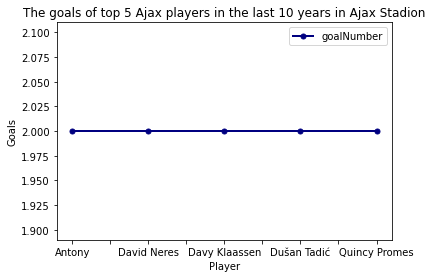

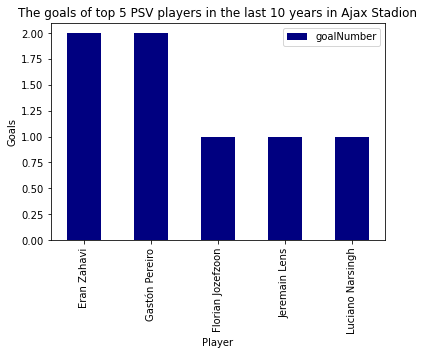

In [882]:
# plot Goals Ajax vs Psv in Ajax Stadion
dfAjaxGoalsinAjaxStadion = pd.DataFrame(playersGoalsAjaxInAjaxStadion.nlargest(n=5))
ax = dfAjaxGoalsinAjaxStadion.plot(lw=2, colormap='jet', marker='.', markersize=10, title='The goals of top 5 Ajax players in the last 10 years in Ajax Stadion')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

dfPsvGoalsinAjaxStadion = pd.DataFrame(playersGoalsAjaxInPsvStadion.nlargest(n=5))
ax = dfPsvGoalsinAjaxStadion.plot(lw=2, colormap='jet', kind = 'bar', title='The goals of top 5 PSV players in the last 10 years in Ajax Stadion')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

In [883]:
# Home team assist and goals
filterAssist = dfGoals[(dfGoals['assistNumber'] == 1) & (dfGoals['goalNumber'] == 1)]
groupByHomeAssist = filterAssist.groupby('home')['assistNumber'].sum()
print(groupByHomeAssist.nlargest(n=5))

# goals 
groupByHomeGoals = dfGoals.groupby('home')['goalNumber'].sum()
print(groupByHomeGoals.nlargest(n=5))

home
ajax-amsterdam    443
psv-eindhoven     408
feyenoord         385
sc-heerenveen     371
az-alkmaar        368
Name: assistNumber, dtype: int64
home
ajax-amsterdam     642
psv-eindhoven      634
feyenoord          583
az-alkmaar         579
heracles-almelo    576
Name: goalNumber, dtype: int64


In [884]:
# Away assist and goals 
groupByAwayAssist = filterAssist.groupby('away')['assistNumber'].sum()
print(groupByAwayAssist.nlargest(n=5))

# goals 
groupByAwayGoals = filterAssist.groupby('away')['goalNumber'].sum()
print(groupByAwayGoals.nlargest(n=5))

away
psv-eindhoven      393
sc-heerenveen      387
ajax-amsterdam     366
heracles-almelo    365
az-alkmaar         360
Name: assistNumber, dtype: int64
away
psv-eindhoven      393
sc-heerenveen      387
ajax-amsterdam     366
heracles-almelo    365
az-alkmaar         360
Name: goalNumber, dtype: int64


### Cards

In [885]:
# Some clubs have different names 
# We replace it to one name 
Duplicates(raw_cards_file, "club", "afc-ajax", "ajax-amsterdam")
Duplicates(raw_cards_file, "club", "willem-ii", "willem-ii-tilburg")

# The cards have different names and we convert them to numbers in order to count them 
Duplicates(raw_cards_file, "card", "rode kaart", "red-card")
Duplicates(raw_cards_file, "card", "rode", "red-card")
Duplicates(raw_cards_file, "card", "kaartrode", "red-card")
Duplicates(raw_cards_file, "card", "gele kaart", "yellow-card")
Duplicates(raw_cards_file, "card", "gele", "yellow-card")
Duplicates(raw_cards_file, "card", "kaartgele", "yellow-card")

# convert the season to int 
raw_cards_file['saison'] = raw_cards_file['saison'].apply(toOneSeason)
raw_cards_file['saison'] = raw_cards_file['saison'].astype(int)

# filter the last 10 seasons 
filterSeasonCards = raw_cards_file[(raw_cards_file['saison'] >= 2012)]

# make new dataframe in order to aggregate
dfCards = pd.DataFrame(filterSeasonCards)
cardsNumber= dfCards['type']
dfCards['cardsNumber'] = cardsNumber
dfCards["cardsNumber"].replace({"red-card": 2, "yellow-card": 1}, inplace=True)
dfCards


,Unnamed: 0,saison,round,home,away,team,player,minute,type,cardsNumber
22582,0,2012,26,ado-den-haag,ajax-amsterdam,ado-den-haag,jens-toornstra,34.0,yellow-card,1
22583,1,2012,26,ado-den-haag,ajax-amsterdam,ado-den-haag,aleksander-radosavljevic,44.0,yellow-card,1
22584,2,2012,26,ado-den-haag,ajax-amsterdam,ado-den-haag,ali-boussaboun,25.0,red-card,2
22585,3,2012,26,ado-den-haag,ajax-amsterdam,ajax-amsterdam,toby-alderweireld,40.0,yellow-card,1
22586,4,2012,26,ado-den-haag,ajax-amsterdam,ajax-amsterdam,theo-janssen,78.0,yellow-card,1
...,...,...,...,...,...,...,...,...,...,...
32287,685,2022,25,willem-ii-tilburg,sc-heerenveen,willem-ii-tilburg,goerkem-saglam,71.0,yellow-card,1
32288,686,2022,12,willem-ii-tilburg,sparta-rotterdam,willem-ii-tilburg,kwasi-wriedt,26.0,yellow-card,1
32289,687,2022,12,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,dirk-abels,77.0,yellow-card,1
32290,688,2022,12,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,adil-auassar,34.0,yellow-card,1


In [886]:
# filter the home and away team 
filterHomeTeam = dfCards[ (dfCards['home'] == dfCards['team'])]
filterAwayTeam = dfCards[ (dfCards['away'] == dfCards['team'])]

##### Cards Away

In [887]:
# Away yellow cards
filterAwayYellowCard = filterAwayTeam[(filterAwayTeam['cardsNumber'] == 1)]
print(f'{len(filterAwayYellowCard.index)} yellow cards is made by away team ')

5217 yellow cards is made by away team 


In [888]:
# How much yellow cards did Ajax get Away 
filterAjaxYellowCardsAway = filterAwayYellowCard[(filterAwayYellowCard['away'] == 'ajax-amsterdam')]
print(f'{len(filterAjaxYellowCardsAway.index)} yellow cards is made by Ajax (Away)')

247 yellow cards is made by Ajax (Away)


In [889]:
# How much yellow cards did PSV get Away 
filterPsvYellowCardsAway = filterAwayYellowCard[(filterAwayYellowCard['away'] == 'psv-eindhoven')]
print(f'{len(filterPsvYellowCardsAway.index)} yellow cards is made by PSV (Away)')

253 yellow cards is made by PSV (Away)


In [890]:
# Away red cards
filterAwayRedCard = filterAwayTeam[(filterAwayTeam['cardsNumber'] == 2)]
print(f'{len(filterAwayRedCard.index)} red cards is made by away team ')

210 red cards is made by away team 


In [891]:
# How much red cards did Ajax get Away 
filterAjaxRedCardsAway = filterAwayRedCard[(filterAwayRedCard['away'] == 'ajax-amsterdam')]
print(f'{len(filterAjaxRedCardsAway.index)} red cards is made by Ajax (Away)')

5 red cards is made by Ajax (Away)


In [892]:
# How much red cards did Psv get Away 
filterPsvRedCardsAway = filterAwayRedCard[(filterAwayRedCard['away'] == 'psv-eindhoven')]
print(f'{len(filterPsvRedCardsAway.index)} red cards is made by Psv (Away)')

8 red cards is made by Psv (Away)


##### Cards Home

In [893]:
# Home yellow cards
filterHomeYellowCard = filterHomeTeam[(filterHomeTeam['cardsNumber'] == 1)]
print(f'{len(filterHomeYellowCard.index)} yellow cards is made by home team ')

3943 yellow cards is made by home team 


In [894]:
# How much yellow cards did Ajax get Home 
filterAjaxYellowCardsHome = filterHomeYellowCard[(filterHomeYellowCard['home'] == 'ajax-amsterdam')]
print(f'{len(filterAjaxYellowCardsHome.index)} yellow cards is made by Ajax (Home)')

128 yellow cards is made by Ajax (Home)


In [895]:
# How much yellow cards did PSV get Away 
filterPsvYellowCardsHome = filterHomeYellowCard[(filterHomeYellowCard['home'] == 'psv-eindhoven')]
print(f'{len(filterPsvYellowCardsHome.index)} yellow cards is made by PSV (Home)')

186 yellow cards is made by PSV (Home)


In [896]:
# Home red cards 
filterHomeRedCard = filterHomeTeam[(filterHomeTeam['cardsNumber'] == 2)]
print(f'{len(filterHomeRedCard.index)} red cards is made by home team ')

150 red cards is made by home team 


In [897]:
# How much red cards did Ajax get Home 
filterAjaxRedCardsHome = filterHomeRedCard[(filterHomeRedCard['home'] == 'ajax-amsterdam')]
print(f'{len(filterAjaxRedCardsHome.index)} red cards is made by Ajax (Home)')

6 red cards is made by Ajax (Home)


In [898]:
# How much red cards did Psv get Home 
filterPsvRedCardsHome = filterHomeRedCard[(filterHomeRedCard['home'] == 'psv-eindhoven')]
print(f'{len(filterPsvRedCardsHome.index)} red cards is made by Psv (Home)')

3 red cards is made by Psv (Home)


#### Yellow and red cards in Psv and Ajax game

##### PSV Stadion

In [899]:
# How much red cards did Ajax get in psv stadion againt PSV
filterAjaxCardsInPsvStadion = dfCards[(dfCards['team'] == "ajax-amsterdam") & (dfCards['home'] == "psv-eindhoven")]
filterAjaxCardsInPsvStadionRedCards = filterAjaxCardsInPsvStadion[(filterAjaxCardsInPsvStadion['cardsNumber'] == 2)]
print(f'{len(filterAjaxCardsInPsvStadionRedCards.index)} red cards is made by Ajax in PSV Stadion (Away)')

1 red cards is made by Ajax in PSV Stadion (Away)


In [900]:
# How much yellow cards did Ajax get in psv stadion againt PSV
filterAjaxCardsInPsvStadionYellowCards = filterAjaxCardsInPsvStadion[(filterAjaxCardsInPsvStadion['cardsNumber'] == 1)]
print(f'{len(filterAjaxCardsInPsvStadionYellowCards.index)} yellow cards is made by Ajax in PSV Stadion (Away)')

18 yellow cards is made by Ajax in PSV Stadion (Away)


In [901]:
# How much red cards did Psv get in psv stadion againt Ajax
filterPSVCardsInPsvStadion = dfCards[(dfCards['team'] == "psv-eindhoven") & (dfCards['away'] == "ajax-amsterdam")]
filterPSVCardsInPsvStadionRedCards = filterPSVCardsInPsvStadion[(filterPSVCardsInPsvStadion['cardsNumber'] == 2)]
print(f'{len(filterPSVCardsInPsvStadionRedCards.index)} red cards is made by PSV in PSV stadion againts ajax (Home)')

0 red cards is made by PSV in PSV stadion againts ajax (Home)


In [902]:
# How much yellow cards did Psv get in psv studium againt Ajax
filterPSVCardsInPsvStadionYellowCards = filterPSVCardsInPsvStadion[(filterPSVCardsInPsvStadion['cardsNumber'] == 1)]
print(f'{len(filterPSVCardsInPsvStadionYellowCards.index)} yellow cards is made by PSV in PSV stadion againts ajax (Home)')

23 yellow cards is made by PSV in PSV stadion againts ajax (Home)


<AxesSubplot:title={'center':'Yellow cards made by PSV or Ajax in PSV Stadion'}>

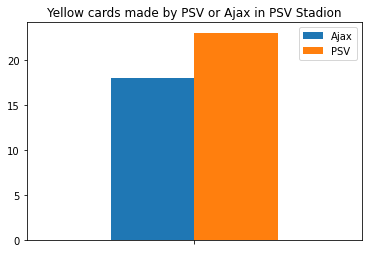

In [932]:
plotdata = pd.DataFrame({
    "Ajax": len(filterAjaxCardsInPsvStadionYellowCards.index),
    "PSV": len(filterPSVCardsInPsvStadionYellowCards.index)
    },
    index=[''],
   
)
plotdata.plot(kind = 'bar', title ="Yellow cards made by PSV or Ajax in PSV Stadion")

<AxesSubplot:title={'center':'Red cards made by PSV or Ajax in PSV Stadion'}>

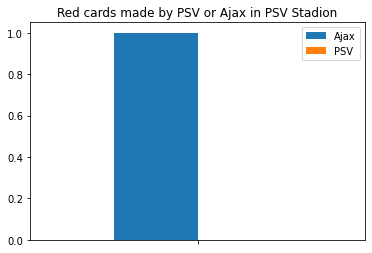

In [933]:
plotdata = pd.DataFrame({
    "Ajax": len(filterAjaxCardsInPsvStadionRedCards.index),
    "PSV": len(filterPSVCardsInPsvStadionRedCards.index)
    },
    index=[''],
   
)
plotdata.plot(kind = 'bar', title ="Red cards made by PSV or Ajax in PSV Stadion")

##### Ajax Stadion

In [903]:
# How much red cards did Ajax get in Ajax stadion againt PSV
filterAjaxCardsInAjaxStadion = dfCards[(dfCards['team'] == "ajax-amsterdam") & (dfCards['away'] == "psv-eindhoven")]
filterAjaxCardsInAjaxStadionRedCards = filterAjaxCardsInAjaxStadion[(filterAjaxCardsInAjaxStadion['cardsNumber'] == 2)]
print(f'{len(filterAjaxCardsInAjaxStadionRedCards.index)} red cards is made by Ajax in Ajax Stadion (Home)')

1 red cards is made by Ajax in Ajax Stadion (Home)


In [904]:
# How much yellow cards did Ajax get in Ajax stadion againt PSV
filterAjaxCardsInAjaxStadionYellowCards = filterAjaxCardsInAjaxStadion[(filterAjaxCardsInAjaxStadion['cardsNumber'] == 1)]
print(f'{len(filterAjaxCardsInAjaxStadionYellowCards.index)} yellow cards is made by Ajax in Ajax Stadion (Home)')

15 yellow cards is made by Ajax in Ajax Stadion (Home)


In [905]:
# How much red cards did PSV get in Ajax stadion againt Ajax
filterPSVCardsInAjaxStadion = dfCards[(dfCards['team'] == "psv-eindhoven") & (dfCards['home'] == "ajax-amsterdam")]
filterPSVCardsInAjaxStadionRedCards = filterPSVCardsInAjaxStadion[(filterPSVCardsInAjaxStadion['cardsNumber'] == 2)]
print(f'{len(filterPSVCardsInAjaxStadionRedCards.index)} red cards is made by PSV in Ajax Stadion (Away)')

0 red cards is made by PSV in Ajax Stadion (Away)


In [906]:
# How much yellow cards did PSV get in Ajax stadion againt Ajax
filterPSVCardsInAjaxStadionYellowCards = filterPSVCardsInAjaxStadion[(filterPSVCardsInAjaxStadion['cardsNumber'] == 1)]
print(f'{len(filterPSVCardsInAjaxStadionYellowCards.index)} yellow cards is made by PSV in Ajax Stadion (Away)')

23 yellow cards is made by PSV in Ajax Stadion (Away)


<AxesSubplot:title={'center':'Yellow cards made by PSV or Ajax in Ajax Stadion'}>

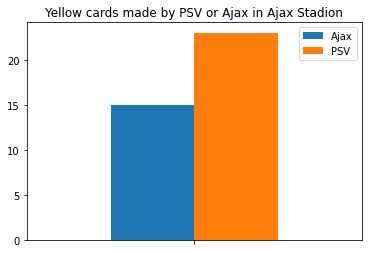

In [931]:
plotdata = pd.DataFrame({
    "Ajax": len(filterAjaxCardsInAjaxStadionYellowCards.index),
    "PSV": len(filterPSVCardsInAjaxStadionYellowCards.index)
    },
    index=[''],
   
)
plotdata.plot(kind = 'bar', title ="Yellow cards made by PSV or Ajax in Ajax Stadion")

<AxesSubplot:title={'center':'Red cards made by PSV or Ajax in Ajax Stadion'}>

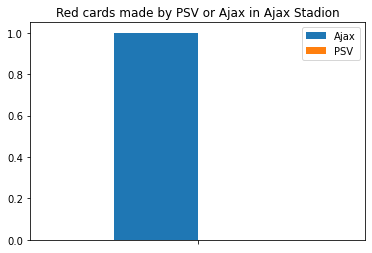

In [930]:
plotdata = pd.DataFrame({
    "Ajax": len(filterAjaxCardsInAjaxStadionRedCards.index),
    "PSV": len(filterPSVCardsInAjaxStadionRedCards.index)
    },
    index=['']
)
plotdata.plot(kind = 'bar', title ="Red cards made by PSV or Ajax in Ajax Stadion")

### Players

In [907]:
# we drop the unneccesary columns 
raw_players_file.drop(columns=['round'])

,index,saison,home,away,team,player,started
0,0,1956-1957,afc-ajax,bvc-amsterdam,afc-ajax,eddy-pieters-graafland,True
1,1,1956-1957,afc-ajax,bvc-amsterdam,afc-ajax,cor-geelhuizen,True
2,2,1956-1957,afc-ajax,bvc-amsterdam,afc-ajax,ger-van-mourik,True
3,3,1956-1957,afc-ajax,bvc-amsterdam,afc-ajax,ad-visser,True
4,4,1956-1957,afc-ajax,bvc-amsterdam,afc-ajax,piet-ouderland,True
...,...,...,...,...,...,...,...
531095,9368,2021-2022,willem-ii,sparta-rotterdam,sparta-rotterdam,vito-van-crooij,False
531096,9369,2021-2022,willem-ii,sparta-rotterdam,sparta-rotterdam,mario-engels,False
531097,9370,2021-2022,willem-ii,sparta-rotterdam,sparta-rotterdam,benjamin-van-leer,False
531098,9371,2021-2022,willem-ii,sparta-rotterdam,sparta-rotterdam,tim-coremans,False


In [908]:
# we replace the 'started' column to numbers in order to count them
raw_players_file["started"].replace({True: 1, False: 0}, inplace=True)

# filter the home and away team 
filterHomeTeamPlayers = raw_players_file[ (raw_players_file['home'] == raw_players_file['team'])]
filterAwayTeamPlayers = raw_players_file[ (raw_players_file['away'] == raw_players_file['team'])]

# How much players play Home
filterStartedPlayersHome = filterHomeTeamPlayers[ (filterHomeTeamPlayers['started'] == 1)]
print(f'{len(filterStartedPlayersHome.index)} players play home')
# How much players did not play Home
filterNotStartedPlayersHome = filterHomeTeamPlayers[ (filterHomeTeamPlayers['started'] == 0)]
print(f'{len(filterNotStartedPlayersHome.index)} players did not play home')

# How much players play Away
filterStartedPlayersAway = filterAwayTeamPlayers[ (filterAwayTeamPlayers['started'] == 1)]
print(f'{len(filterStartedPlayersAway.index)} players play away')
# How much players did not play Away
filterNotStartedPlayersAway = filterAwayTeamPlayers[ (filterAwayTeamPlayers['started'] == 0)]
print(f'{len(filterNotStartedPlayersAway.index)} players did not play away')

212686 players play home
49729 players did not play home
217217 players play away
51468 players did not play away


### Matches

In [909]:
Duplicates(raw_matches_file, "match", "afc-ajax", "ajax-amsterdam")
Duplicates(raw_matches_file, "match", "willem-ii", "willem-ii-tilburg")

# convert the season to int 
raw_matches_file['saison'] = raw_matches_file['saison'].apply(toOneSeason)
raw_matches_file['saison'] = raw_matches_file['saison'].astype(int)

# # filter the last 10 seasons 
filterSeasonMatches = raw_matches_file[(raw_matches_file['saison'] >= 2012) & 
                                        (raw_matches_file['home_score'] != "-") &
                                         (raw_matches_file['away_score'] != "-")]

filterSeasonMatches['home_score'] = pd.to_numeric(filterSeasonMatches['home_score'])
filterSeasonMatches['away_score'] = pd.to_numeric(filterSeasonMatches['away_score'])

# we drop the unneccesary columns 
filtered_matches = filterSeasonMatches.drop(columns=['stadium','home_first_card','home_last_card',
                                                 'away_first_card', 'time','date','round',
                                                 'spectators', 'ref','linesman1','linesman2', 'away_last_card',
                                                 'home_yellow', 'home_yelred', 'away_yellow','first_goal', 'last_goal',
                                                  'away_red','home_red', 'away_yelred'])

# drop the empty rows
filtered_matches.dropna()
filtered_matches

C:\Users\malja\AppData\Local\Temp/ipykernel_20940/3070928476.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterSeasonMatches['home_score'] = pd.to_numeric(filterSeasonMatches['home_score'])
C:\Users\malja\AppData\Local\Temp/ipykernel_20940/3070928476.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterSeasonMatches['away_score'] = pd.to_numeric(filterSeasonMatches['away_score'])


,Unnamed: 0,saison,home,away,home_score,away_score
16566,0,2012,ado-den-haag,ajax-amsterdam,0,2
16567,1,2012,ado-den-haag,az-alkmaar,0,6
16568,2,2012,ado-den-haag,de-graafschap,3,5
16569,3,2012,ado-den-haag,fc-groningen,3,0
16570,4,2012,ado-den-haag,fc-twente,1,1
...,...,...,...,...,...,...
19924,300,2022,willem-ii-tilburg,psv-eindhoven,2,1
19925,301,2022,willem-ii-tilburg,rkc-waalwijk,3,1
19926,302,2022,willem-ii-tilburg,sc-cambuur,1,3
19927,303,2022,willem-ii-tilburg,sc-heerenveen,0,0


In [910]:
# WinningHomeTeamFilter
WinningHomeTeamFilter = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score'])]
print(f'The Home team won {len(WinningHomeTeamFilter.index)} matches')

# WinningAwayTeamFilter
WinningAwayTeamFilter = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score'])]
print(f'The Away team won {len(WinningAwayTeamFilter.index)} matches')

# DrawFilter
DrawTeamFilter = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score'])]
print(f'The draw was in {len(DrawTeamFilter.index)} matches')

The Home team won 1485 matches
The Away team won 973 matches
The draw was in 750 matches


##### Ajax General Stats

In [925]:
AjaxWinHome = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "ajax-amsterdam") ]

AjaxGoalsHomeWin =AjaxWinHome['home_score'].sum()
AwayGoalsLoseAgaintsAjax =AjaxWinHome['away_score'].sum()

print(f'Ajax won {len(AjaxWinHome.index)} matches Home') 
print(f'Ajax score {AjaxGoalsHomeWin} goals Home') 
print(f'Ajax got {len(AjaxWinHome.index) * 3} points Home when he won')
print(f'Away team scores {AwayGoalsLoseAgaintsAjax} goals when Ajax won')                                               

Ajax won 139 matches Home
Ajax score 485 goals Home
Ajax got 417 points Home when he won
Away team scores 64 goals when Ajax won


In [924]:
AjaxloseHome = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "ajax-amsterdam") ]

AjaxGoalsHomeLose =AjaxloseHome['home_score'].sum()
AwayGoalsWonAgaintsAjax =AjaxloseHome['away_score'].sum()

print(f'Ajax lose {len(AjaxloseHome.index)} matches Home') 
print(f'Ajax score {AjaxGoalsHomeLose} goals Home when he lose')
print(f'Away team scores {AwayGoalsWonAgaintsAjax} goals when Ajax lose')   

Ajax lose 14 matches Home
Ajax score 7 goals Home when he lose
Away team scores 26 goals when Ajax lose


In [928]:
AjaxDrawHome = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "ajax-amsterdam") ]

AjaxGoalsDraw =AjaxDrawHome['home_score'].sum()
AwayGoalsDraw =AjaxDrawHome['away_score'].sum()

print(f'Ajax draws {len(AjaxDrawHome.index)} matches Home') 
print(f'Ajax scores {AjaxGoalsDraw} goals Home when he draws')
print(f'Away team scores {AwayGoalsDraw} goals when he draws with Ajax') 

Ajax draws 26 matches Home
Ajax scores 30 goals Home when he draws
Away team scores 30 goals when he draws with Ajax


<AxesSubplot:title={'center':'Ajax Stats when playing Home'}>

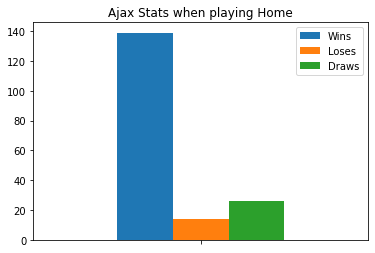

In [943]:
plotdata = pd.DataFrame({
    "Wins": len(AjaxWinHome.index),
    "Loses": len(AjaxloseHome.index),
    "Draws": len(AjaxDrawHome.index)
    },
    index=[''],
   
)
plotdata.plot(kind = 'bar', title ="Ajax Stats when playing Home")

In [945]:
AjaxWinAway = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score']) & 
                                         (filtered_matches['away'] == "ajax-amsterdam") ]

AjaxGoalsAwayWin = AjaxWinAway['away_score'].sum()
HomeGoalsLoseAgainstAjax = AjaxWinAway['home_score'].sum()

print(f'Ajax won {len(AjaxWinAway.index)} matches Away') 
print(f'Ajax score {AjaxGoalsAwayWin} goals Away') 
print(f'Ajax got {len(AjaxWinAway.index) * 3} points Home when he won')
print(f'Home team scores {HomeGoalsLoseAgainstAjax} goals when Ajax won')                                               

Ajax won 115 matches Away
Ajax score 338 goals Away
Ajax got 345 points Home when he won
Home team scores 65 goals when Ajax won


In [946]:
AjaxLoseAway = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score']) & 
                                         (filtered_matches['away'] == "ajax-amsterdam") ]

AjaxGoalsAwayLose = AjaxLoseAway['away_score'].sum()
HomeGoalsWinAgainstAjax = AjaxLoseAway['home_score'].sum()

print(f'Ajax lose {len(AjaxLoseAway.index)} matches Away') 
print(f'Ajax score {AjaxGoalsAwayLose} goals Away') 
print(f'Home team scores {HomeGoalsWinAgainstAjax} goals when Ajax lose')          

Ajax lose 24 matches Away
Ajax score 18 goals Away
Home team scores 55 goals when Ajax won


In [947]:
AjaxLoseDraw = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score']) & 
                                         (filtered_matches['away'] == "ajax-amsterdam") ]

AjaxGoalsAwayDraw = AjaxLoseDraw['away_score'].sum()
HomeGoalsDrawAgainstAjax = AjaxLoseDraw['home_score'].sum()

print(f'Ajax draw {len(AjaxLoseDraw.index)} matches Away') 
print(f'Ajax score {AjaxGoalsAwayDraw} goals Away') 
print(f'Home team scores {HomeGoalsDrawAgainstAjax} goals when Ajax draw')          

Ajax draw 37 matches Away
Ajax score 47 goals Away
Home team scores 47 goals when Ajax won


##### PSV General Stats

In [923]:
PSVWinHome = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "psv-eindhoven") ]

PSVGoalsHomeWin =PSVWinHome['home_score'].sum()
AwayGoalsLoseAgaintsPSV =PSVWinHome['away_score'].sum()
print(f'PSV won {len(PSVWinHome.index)} matches Home') 
print(f'PSV score {PSVGoalsHomeWin} goals Home') 
print(f'PSV got {len(PSVWinHome.index) * 3} points Home when he won')
print(f'Away team scores {AwayGoalsLoseAgaintsPSV} goals when PSV won')    

PSV won 144 matches Home
PSV score 450 goals Home
PSV got 432 points Home when he won
Away team scores 86 goals when PSV won


In [922]:
PSVloseHome = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "psv-eindhoven") ]

PSVGoalsHomeLose =PSVloseHome['home_score'].sum()
AwayGoalsWonAgaintsPSV =PSVloseHome['away_score'].sum()
print(f'PSV loses {len(PSVloseHome.index)} matches Home') 
print(f'PSV scores {PSVGoalsHomeLose} goals Home when he loses') 
print(f'Away team scores {AwayGoalsWonAgaintsPSV} goals when PSV loses') 

PSV loses 15 matches Home
PSV scores 14 goals Home when he loses
Away team scores 46 goals when PSV loses


In [929]:
PSVDrawHome = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "psv-eindhoven") ]

PSVGoalsDraw =PSVDrawHome['home_score'].sum()
AwayGoalsDrawPSV =PSVDrawHome['away_score'].sum()

print(f'PSV draws {len(PSVDrawHome.index)} matches Home') 
print(f'PSV scores {PSVGoalsDraw} goals Home when he draws')
print(f'Away team scores {AwayGoalsDrawPSV} goals when he draws with PSV') 

PSV draws 19 matches Home
PSV scores 19 goals Home when he draws
Away team scores 19 goals when he draws with PSV


In [948]:
PSVWinAway = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score']) & 
                                         (filtered_matches['away'] == "psv-eindhoven") ]

PSVGoalsAwayWin = PSVWinAway['away_score'].sum()
HomeGoalsLoseAgainstPSV = PSVWinAway['home_score'].sum()

print(f'PSV won {len(PSVWinAway.index)} matches Away') 
print(f'PSV score {PSVGoalsAwayWin} goals Away') 
print(f'PSV got {len(PSVWinAway.index) * 3} points Away when he won')
print(f'Home team scores {HomeGoalsLoseAgainstPSV} goals when PSV won')          

PSV won 100 matches Away
PSV score 306 goals Away
PSV got 300 points Away when he won
Home team scores 75 goals when PSV won


In [949]:
PSVLoseAway = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score']) & 
                                         (filtered_matches['away'] == "psv-eindhoven") ]

PSVGoalsAwayLose = PSVLoseAway['away_score'].sum()
HomeGoalsWinAgainstPSV = PSVLoseAway['home_score'].sum()

print(f'PSV lose {len(PSVLoseAway.index)} matches Away') 
print(f'PSV score {PSVGoalsAwayLose} goals Away') 
print(f'Home team scores {HomeGoalsWinAgainstPSV} goals when PSV lose') 

PSV lose 40 matches Away
PSV score 24 goals Away
Home team scores 94 goals when PSV lose


In [950]:
PSVDrawAway = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score']) & 
                                         (filtered_matches['away'] == "psv-eindhoven") ]

PSVGoalsAwayDraw = PSVDrawAway['away_score'].sum()
HomeGoalsDrawAgainstPSV = PSVDrawAway['home_score'].sum()

print(f'PSV draw {len(PSVDrawAway.index)} matches Away') 
print(f'PSV score {PSVGoalsAwayDraw} goals Away') 
print(f'Home team scores {HomeGoalsDrawAgainstPSV} goals when PSV draw') 

PSV draw 39 matches Away
PSV score 60 goals Away
Home team scores 60 goals when PSV draw


<AxesSubplot:title={'center':'PSV Stats when playing Home'}>

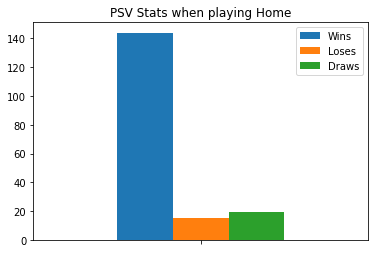

In [944]:
plotdata = pd.DataFrame({
    "Wins": len(PSVWinHome.index),
    "Loses": len(PSVloseHome.index),
    "Draws": len(PSVDrawHome.index)
    },
    index=[''],
   
)
plotdata.plot(kind = 'bar', title ="PSV Stats when playing Home")

##### PSV Vs Ajax in PSV stadion

In [936]:
PSVWinHomeAgainstAjax = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "psv-eindhoven") &
                                         (filtered_matches['away'] == "ajax-amsterdam") ]

PSVGoalsHomeAgainstAjaxWin = PSVWinHomeAgainstAjax['home_score'].sum()
AjaxGoalsAwayAgainstPSVLose = PSVWinHomeAgainstAjax['away_score'].sum()

print(f'PSV won {len(PSVWinHomeAgainstAjax.index)} matches Home against Ajax') 
print(f'PSV scores {PSVGoalsHomeAgainstAjaxWin} goals Home against Ajax')
print(f'Ajax scores {PSVGoalsHomeAgainstAjaxWin} goals againt PSV in PSV stadion') 

PSV won 4 matches Home against Ajax
PSV scores 11 goals Home against Ajax
Ajax scores 0 goals againt PSV in PSV stadion


In [937]:
PSVLoseHomeAgainstAjax = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "psv-eindhoven") &
                                         (filtered_matches['away'] == "ajax-amsterdam") ]

PSVGoalsHomeAgainstAjaxLose = PSVLoseHomeAgainstAjax['home_score'].sum()
AjaxGoalsAwayAgainstPSVWin = PSVLoseHomeAgainstAjax['away_score'].sum()

print(f'PSV lose {len(PSVLoseHomeAgainstAjax.index)} matches Home against Ajax') 
print(f'PSV scores {PSVGoalsHomeAgainstAjaxLose} goals Home against Ajax')
print(f'Ajax scores {AjaxGoalsAwayAgainstPSVWin} goals againt PSV in PSV stadion') 

PSV lose 4 matches Home against Ajax
PSV scores 4 goals Home against Ajax
Ajax scores 10 goals againt PSV in PSV stadion


In [938]:
PSVDrawHomeAgainstAjax = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "psv-eindhoven") &
                                         (filtered_matches['away'] == "ajax-amsterdam") ]

PSVGoalsHomeAgainstAjaxDraw = PSVDrawHomeAgainstAjax['home_score'].sum()
AjaxGoalsAwayAgainstPSVDraw = PSVDrawHomeAgainstAjax['away_score'].sum()

print(f'PSV draw {len(PSVDrawHomeAgainstAjax.index)} matches Home against Ajax') 
print(f'PSV scores {PSVGoalsHomeAgainstAjaxDraw} goals Home against Ajax')
print(f'Ajax scores {AjaxGoalsAwayAgainstPSVDraw} goals againt PSV in PSV stadion') 

PSV draw 3 matches Home against Ajax
PSV scores 4 goals Home against Ajax
Ajax scores 4 goals againt PSV in PSV stadion


##### PSV Vs Ajax in AJAX stadion

In [939]:
AjaxWinHomeAgainstPSV = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "ajax-amsterdam") &
                                         (filtered_matches['away'] == "psv-eindhoven") ]

AjaxGoalsHomeAgainstPSVWin = AjaxWinHomeAgainstPSV['home_score'].sum()
PSVGoalsAwayAgainstAjaxLose = AjaxWinHomeAgainstPSV['away_score'].sum()

print(f'Ajax won {len(AjaxWinHomeAgainstPSV.index)} matches Home against PSV') 
print(f'Ajax scores {AjaxGoalsHomeAgainstPSVWin} goals Home against PSV')
print(f'PSV scores {PSVGoalsAwayAgainstAjaxLose} goals againt AJAX in AJAX stadion') 

Ajax won 7 matches Home against PSV
Ajax scores 18 goals Home against PSV
PSV scores 2 goals againt AJAX in AJAX stadion


In [940]:
AjaxLoseHomeAgainstPSV = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "ajax-amsterdam") &
                                         (filtered_matches['away'] == "psv-eindhoven") ]

AjaxGoalsHomeAgainstPSVLose = AjaxLoseHomeAgainstPSV['home_score'].sum()
PSVGoalsAwayAgainstAjaxWin = AjaxLoseHomeAgainstPSV['away_score'].sum()

print(f'Ajax lose {len(AjaxLoseHomeAgainstPSV.index)} matches Home against PSV') 
print(f'Ajax scores {AjaxGoalsHomeAgainstPSVLose} goals Home against PSV')
print(f'PSV scores {PSVGoalsAwayAgainstAjaxWin} goals againt AJAX in AJAX stadion') 

Ajax lose 2 matches Home against PSV
Ajax scores 2 goals Home against PSV
PSV scores 5 goals againt AJAX in AJAX stadion


In [942]:
AjaxDrawHomeAgainstPSV = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "ajax-amsterdam") &
                                         (filtered_matches['away'] == "psv-eindhoven") ]

AjaxGoalsHomeAgainstPSVDraw = AjaxDrawHomeAgainstPSV['home_score'].sum()
PSVGoalsAwayAgainstAjaxDraw = AjaxDrawHomeAgainstPSV['away_score'].sum()

print(f'Ajax draw {len(AjaxDrawHomeAgainstPSV.index)} matches Home against PSV') 
print(f'Ajax scores {AjaxGoalsHomeAgainstPSVDraw} goals Home against PSV')
print(f'PSV scores {PSVGoalsAwayAgainstAjaxDraw} goals againt AJAX in AJAX stadion') 

Ajax draw 2 matches Home against PSV
Ajax scores 3 goals Home against PSV
PSV scores 3 goals againt AJAX in AJAX stadion


### Changing the players

In [912]:
# How much subs did the home and away teams made 
# we drop the unneccesary columns 
filtered_subs = raw_subs_file.drop(columns=['minute','player','round','saison'])
filtered_subs["in"].replace({False: 0, True: 1 }, inplace=True)

filterHomeTeamSubs = filtered_subs[ (filtered_subs['home'] == filtered_subs['team'])]
filterAwayTeamSubs = filtered_subs[ (filtered_subs['away'] == filtered_subs['team'])]

# How much subs Home team made
filterSubsHome = filterHomeTeamSubs[ (filterHomeTeamSubs['in'] == 1)]
print(f'{len(filterSubsHome.index)} subs the home team made')

# How much subs Away team made
filterSubsAway = filterAwayTeamSubs[ (filterAwayTeamSubs['in'] == 1)]
print(f'{len(filterSubsAway.index)} subs the Away team made')

31728 subs the home team made
32505 subs the Away team made


### AJAX VS PSV Stats

#### Goals

In [913]:
ajaxGoalsHome = filterAssist[ (filterAssist['home'] == 'ajax-amsterdam')]

print(f'Ajax Amsterdam Home Goals {len(ajaxGoalsHome.index)}')


ajaxGoalsAway = filterAssist[ (filterAssist['away'] == 'ajax-amsterdam')]

print(f'Ajax Amsterdam Away Goals {len(ajaxGoalsAway.index)}')


psvGoalsHome = filterAssist[ (filterAssist['home'] == 'psv-eindhoven')]

print(f'psv eindhoven Home Goals {len(psvGoalsHome.index)}')

psvGoalsAway = filterAssist[ (filterAssist['away'] == 'psv-eindhoven')]

print(f'psv eindhoven Away Goals {len(psvGoalsAway.index)}')

Ajax Amsterdam Home Goals 443
Ajax Amsterdam Away Goals 366
psv eindhoven Home Goals 408
psv eindhoven Away Goals 393


<AxesSubplot:>

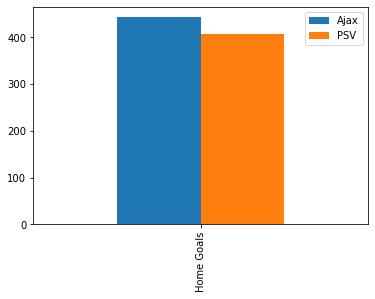

In [914]:
plotdata = pd.DataFrame({
    "Ajax": len(ajaxGoalsHome.index),
    "PSV": len(psvGoalsHome.index)
    }, 
    index=["Home Goals"]
)
plotdata.plot(kind="bar")

<AxesSubplot:>

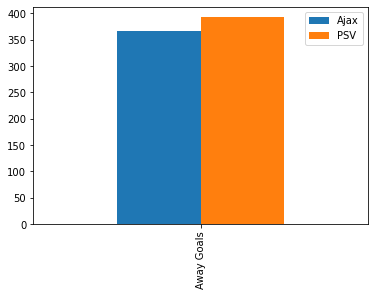

In [915]:
plotdata = pd.DataFrame({
    "Ajax": len(ajaxGoalsAway.index),
    "PSV": len(psvGoalsAway.index)
    }, 
    index=["Away Goals"]
)
plotdata.plot(kind="bar")